In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"C:\Users\zagga\Downloads\prediction_data.xlsx"

sheet_name = "in"

data = pd.read_excel(file_path, sheet_name = sheet_name)

print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   83333-BIH  Female   19      No           Bihar                    4   
1   83335-HAR  Female   37      No         Haryana                   15   
2   83336-AND  Female   38     Yes  Andhra Pradesh                    7   
3   83338-MAH    Male   61      No     Maharashtra                    4   
4   83363-TEL    Male   27      No       Telangana                   11   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 3        NaN           Yes            Yes  ...   
1                13        NaN           Yes            Yes  ...   
2                31     Deal 4           Yes             No  ...   
3                21     Deal 2           Yes             No  ...   
4                15     Deal 3           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal     107.400002   5121.299805           0.0   
1  Bank Wi

In [14]:
data = data.drop(['Customer_ID', 'Churn_Category', 'Churn_Reason'], axis = 1)

columns_to_encode = ['Gender', 'Married',	'State',	'Value_Deal',	'Phone_Service',	'Multiple_Lines',	
                     'Internet_Service',	'Internet_Type',	'Online_Security',	'Online_Backup',	'Device_Protection_Plan',	
                     'Premium_Support',	'Streaming_TV',	'Streaming_Movies',	'Streaming_Music',	'Unlimited_Data',	
                     'Contract',	'Paperless_Billing',	'Payment_Method']

label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

X = data.drop('Customer_Status', axis =1)
y = data['Customer_Status']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)



In [15]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion matrix: 
[[804  50]
 [116 232]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       854
           1       0.82      0.67      0.74       348

    accuracy                           0.86      1202
   macro avg       0.85      0.80      0.82      1202
weighted avg       0.86      0.86      0.86      1202



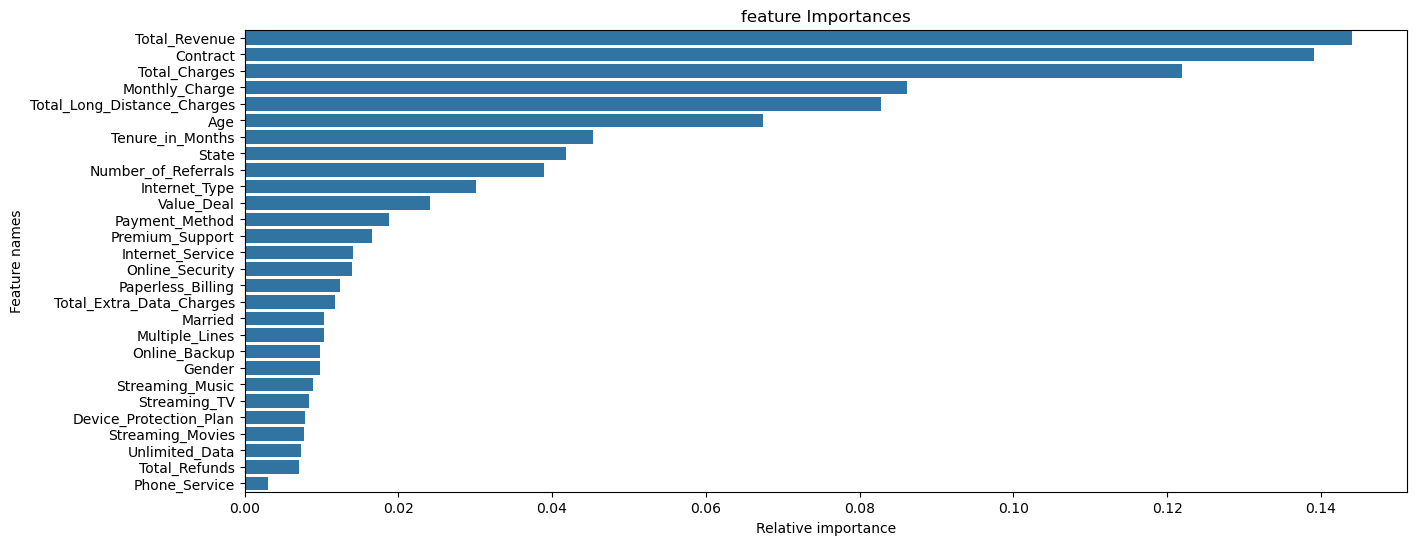

In [16]:
y_pred = rf_model.predict(X_test)

print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('feature Importances')
plt.xlabel('Relative importance')
plt.ylabel("Feature names")
plt.show()